#### Steps of EDA
##### problem statement

* Univariate Analysis (Num & Cat): For numarical variable

* we build distplot or Histograms to check the shape of the data. we can also build Boxplots for Numerical data to check the presence of outliers. However, for categorical data , we need to build countplot (Frequency Plot).

* Bivariate Analysis (Predictors vs Target): If my predictor is numerical column and the target is also numerical then we will build the Scatterplot.However if the predictor is catogerical and the target is numerical then we can build either boxplot or violinplot. For predictor and target to be categorical, we can build a cross tabulated data and plot the frequency.

* Missing Values

* Outlier Identification & Removal : Any value greater than Q3+1.5IQR is considered to be an outlier on the upper side where as any value which is less than Q1 - 1.5 IQR is an inlier....

* Feature Engineering: Extracting the set of new features from the existing set of features. The purpose of feature engineering is to ensure that we try to create new features such that the machine is able to learn the pattern efficiently and the model is able to generalise on the basis of new information provided.

* Statistical Analysis: this is where we will do the Hypothesis testing of the new & old variables with the target. If the statistical test suggests that the predictors have a relation with the target, we will include those features into the modelling.

* Cateogorical Variable Analysis : Here in this step, we convert the categories into dummies. One Hot Encoding, Frequency Encoding, Label Encoding (Ordinal Encoding) & Target Encoding.

* Scaling and Transformation: Standard Scaler, Min Max Scaler Note: When there are outliers in the data use a scaling technique called ** Robust Scaler **

* Transformation: Log , Power , Reciprocal , Sqrt , Cuberoot , Yeo Johnson , Boxcox

Sale Prediction for Big Mart Outlets ( Problem Statements)
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [306]:
data = pd.read_csv('housing+data.csv')

In [307]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


In [308]:
# Remove any unnecessary columns in the data
del data['Id']

In [309]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


In [310]:
# How many rows and columns
print ('Rows: ', data.shape[0]) 
print ('Columns: ', data.shape[1])

Rows:  1418
Columns:  12


In [311]:
# Explain the five point summary of the data set 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.0,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.0,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.0,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


* Columns SalePrice, GrLivArea, GarageArea, TotalBsmtSF are right skewed and might have outliers.
* GarageCars, FullBath and OverallQual are number categories
* YearBuilt is the age of the property between 1872 to 2010

In [312]:
data.describe(include = 'object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


* Most of the electrical is 'SBrkr' (mode)
* Very few values in Fence and MiscFeature 

In [313]:
# Drow a heatmap to show the correlation between the features 

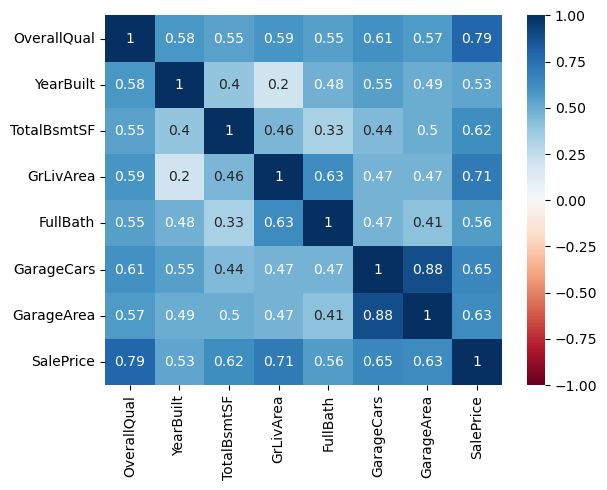

In [314]:
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

* The targate variable has the max corelation with OverallQual, GrLivArea, and GarageCars
* These corelations are heily effected by the presence of outlyers. The values of corelation matrick mit change after rating the outlyers. The values in the corelation metrick mit change after outlyer 

In [315]:
# Seperate the category columns and the number columns from the dataset and perform the univariate analysis

In [316]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

In [317]:
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols = ['OverallQual','Electrical','FullBath','GarageType','GarageCars','MiscFeature']

In [318]:
num_cols

['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

In [319]:
cat_cols

['OverallQual',
 'Electrical',
 'FullBath',
 'GarageType',
 'GarageCars',
 'MiscFeature']

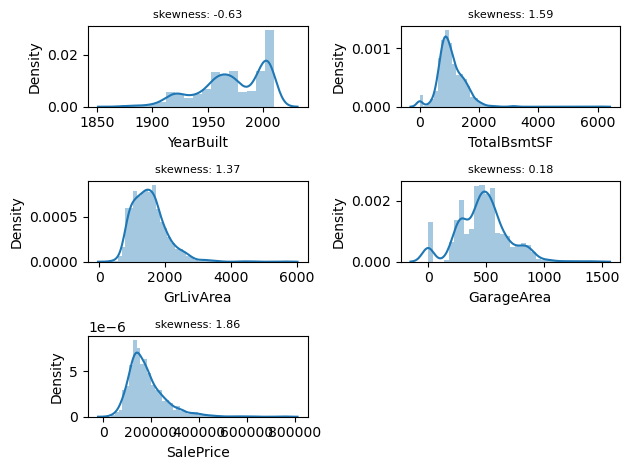

In [320]:
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title(f'skewness: {round(data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

* Inferences

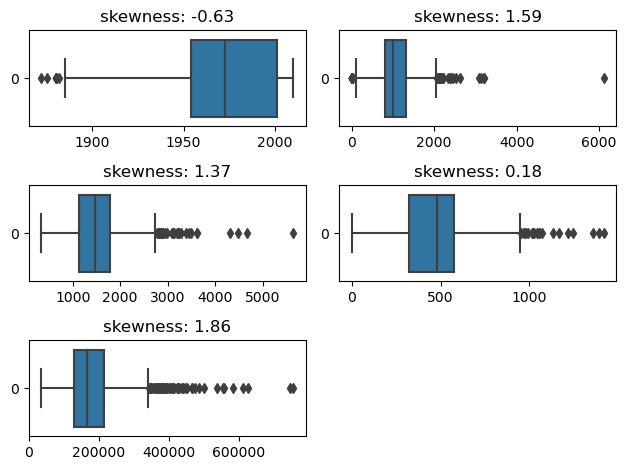

In [321]:
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.title(f'skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

* Inferences


In [322]:
# univariate anilises for Cat col
# Show the distribution of cat col

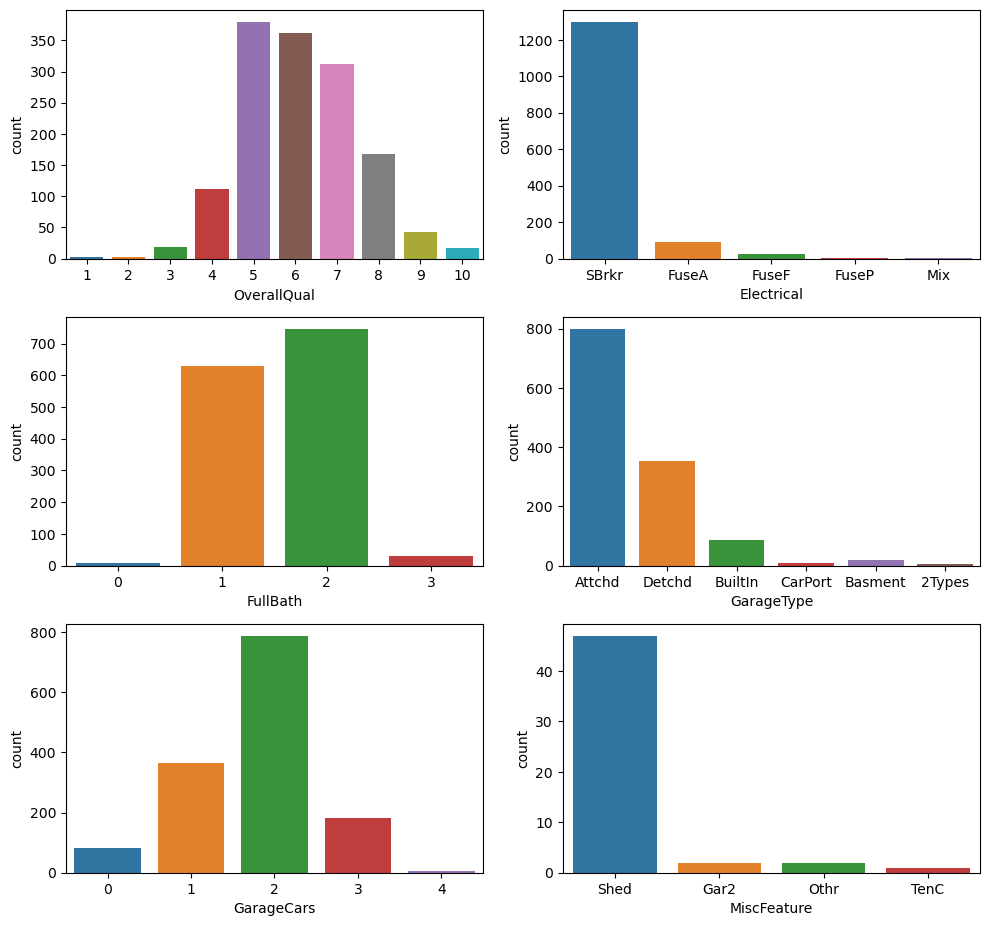

In [323]:
t=1
plt.figure(figsize=(10,12))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data.select_dtypes(include=object),x=data[i])
    t+=1
plt.tight_layout()
plt.show()

* Most of the houses have overole quality 5,6 and 7
* Maximum houses have 1 or 2 FullBath 3 and 0 are very less
* Most of the houses have the fes park 2 car

## Bivariate analysis num vs num

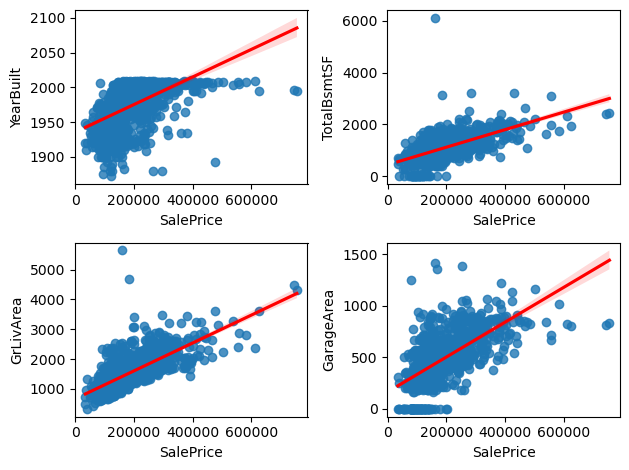

In [324]:
t= 1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()

* As the total basment area is increasing the sales price is also increasing its a positive relation with salesPrice 

### Bivariate analysis num vs col

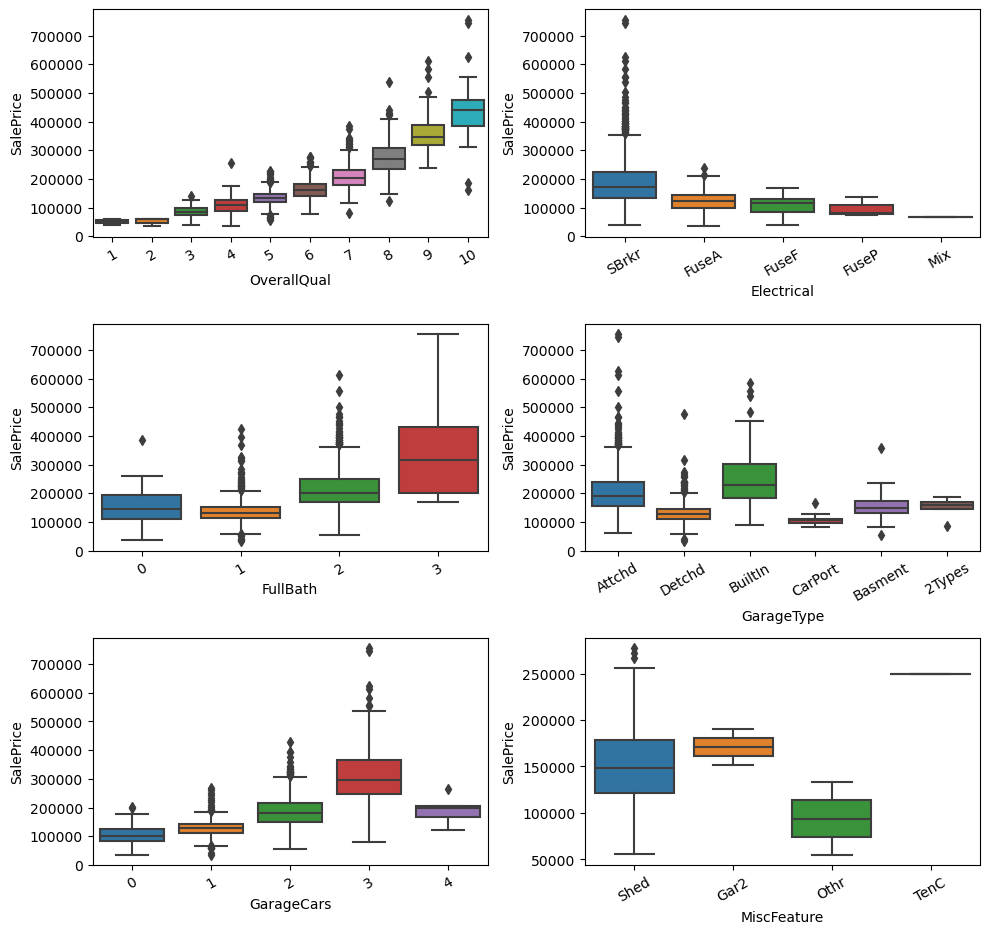

In [325]:
t=1
plt.figure(figsize=(10,12))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=data[i],y=data['SalePrice'])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

* As the OverallQual increase the SalePrice is also increase


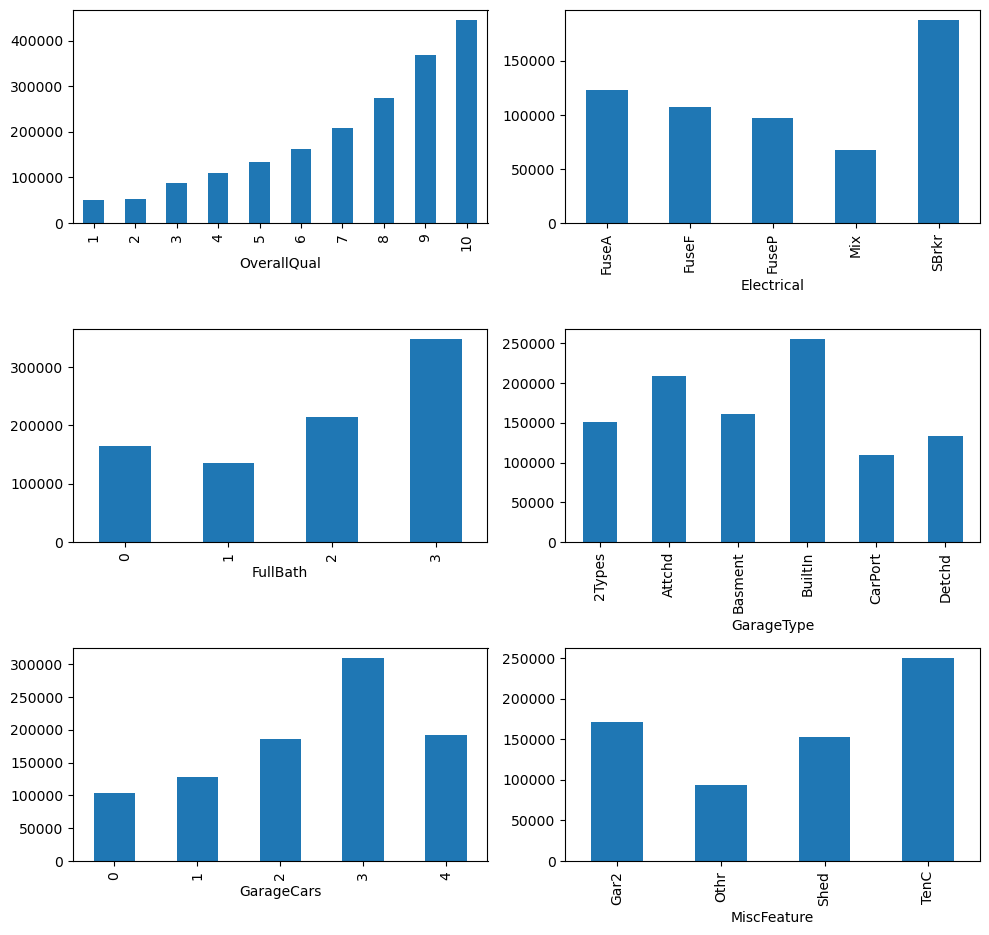

In [326]:
t=1
plt.figure(figsize=(10,12))
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

In [327]:
# Treat the defects in the dataset
# Treat the missing value and the outliers

In [328]:
# Missing value treatment 
# Closest fit 
# Central value imputation
# Deletion

In [329]:
# First lets calculate the persentage of missing data
data.isnull().sum()

OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [330]:
# in persentage 
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [331]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [332]:
data['GarageType']=np.where((data['GarageCars']==0)&(data['GarageArea']==0),'NoGarage',data['GarageType'])

In [333]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [334]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [335]:
data['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [336]:
data[data['GarageCars']==1]['GarageType'].value_counts()

GarageType
Detchd     178
Attchd     105
BuiltIn      8
Basment      8
CarPort      3
Name: count, dtype: int64

In [337]:
data['GarageType']=np.where(data['GarageType'].isnull(), 'Detchd',data['GarageType'])

In [338]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [339]:
# Electrical
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [340]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [341]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [342]:
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [343]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,5,1950,1078,FuseA,1078,1,Detchd,1,240,NaN,NaN,142125


In [344]:
# Lets delete MiscFeature and Fence
data.drop(columns=['Fence','MiscFeature'],inplace=True)

In [345]:
data.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [346]:
# Outlier Treatment

In [347]:
# GrLivArea
data[data['GrLivArea']>4000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
665,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [348]:
# GrLivArea
data[data['GrLivArea']>5000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [349]:
# TotalBsmtSF
data[data['TotalBsmtSF']>5000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [350]:
# SalePrice
data[data['SalePrice']>700000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [351]:
# We can drop these three points
data.drop(index=[1260,665,1147],inplace=True)

<Axes: >

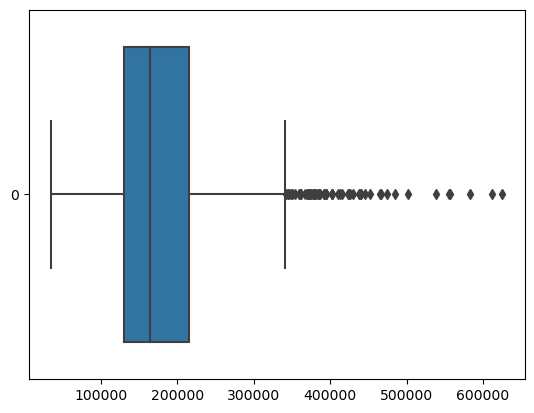

In [352]:
sns.boxplot(data['SalePrice'],orient='h')

In [353]:
# Caping

In [354]:
#q1,q3 = np.quantile(data['SalePrice'],[0.25,0.75])
#iqr=q3-q1
#ul =q3+1.5*(iqr)
#data['SalePrice']=np.where(data['SalePrice']>ul,ul,data['SalePrice'])

In [355]:
#sns.boxplot(data['SalePrice'],orient='h')

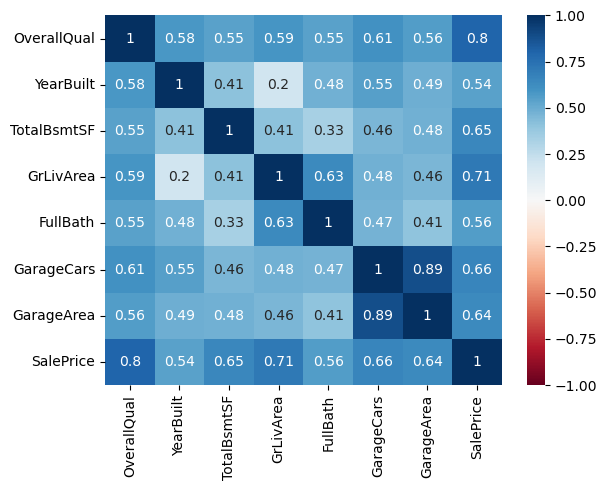

In [356]:
sns.heatmap(data.select_dtypes(include=np.number).corr(),vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.show()

In [357]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125


In [358]:
# Treat all the object datatypes with appropriate encoding tecnique

In [359]:
# One hot encoding
# Dummy encoding
# Label encoding
# Target encoding
# Frequcny encoding

In [360]:
data[data.select_dtypes('object').columns]

,Electrical,GarageType
0,SBrkr,Attchd
1,SBrkr,Attchd
2,SBrkr,Attchd
3,SBrkr,Detchd
4,SBrkr,Attchd
...,...,...
1413,SBrkr,Attchd
1414,SBrkr,Attchd
1415,SBrkr,Attchd
1416,FuseA,Detchd


In [361]:
 data['Electrical'].value_counts()

Electrical
SBrkr    1298
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: count, dtype: int64

In [362]:
data['GarageType'].value_counts()

GarageType
Attchd      797
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [363]:
#data['Electrical']= np.where(data['Electrical']=='SBrkr','SBrkr','Others')

In [364]:
data['Electrical']= np.where(data['Electrical']=='SBrkr',1,0)

In [365]:
 data['Electrical'].value_counts()

Electrical
1    1298
0     117
Name: count, dtype: int64

In [366]:
map_data= data['GarageType'].value_counts().to_dict()

In [367]:
map_data # Frequcny encoding

{'Attchd': 797,
 'Detchd': 416,
 'BuiltIn': 87,
 'NoGarage': 81,
 'Basment': 19,
 'CarPort': 9,
 '2Types': 6}

In [369]:
# Target encoding
map_data= np.round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()

In [370]:
map_data

{'2Types': 151283.0,
 'Attchd': 207401.0,
 'Basment': 160571.0,
 'BuiltIn': 255680.0,
 'CarPort': 109962.0,
 'Detchd': 133853.0,
 'NoGarage': 103317.0}